# Import libraries 

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Data 

In [41]:
train = pd.read_csv('train.csv')

## let's see our data 

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train.shape

(891, 12)

It has 891 rows and 12 coloumns 

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that Age and Cabin have Null values. 

The number of missing values in Age is less and hence can be fixed with reasonable replacement 

The number of missing values in Cabin is way too many to be fixed with reasonable replacement. 
We can either drop the column or just change it to 0 and 1. (0: value not given ; 1: value given)

We can also see 2 missing values in Embarked 

In [47]:
# checking for unique values 
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

We can see that we have 891 passengers 

Survived tells if person survived (1), not survived (0)

Pclass tells : 1st, 2nd or 3rd class 

Sex: male or female 

age: we have 88 unique age people 



In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

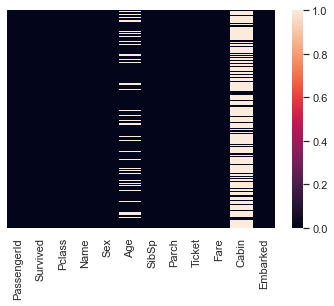

In [49]:
# lets vidualize the missing data 
sns.heatmap(train.isnull(),yticklabels=False)

### Let's check the number of people survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

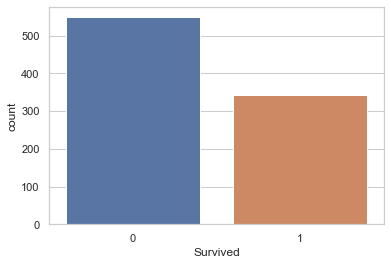

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

We can see that more than 500 people did not survive and about 350 people survived 

### Let's see how many of these were male and females 

<AxesSubplot:xlabel='Survived', ylabel='count'>

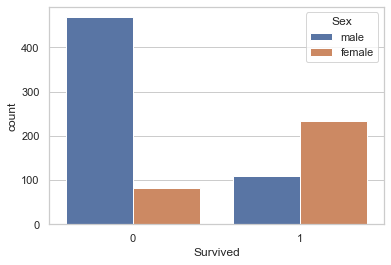

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

Many people who didn't survive were males 
Many people who did survive were females 

### Let's do the same with Pclass 

<AxesSubplot:xlabel='Survived', ylabel='count'>

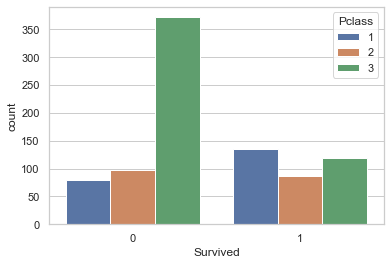

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

People from 3rd class did not survive 
Comparatively fewer people from 1st class died

### Let's check for embarked as well

<AxesSubplot:xlabel='Survived', ylabel='count'>

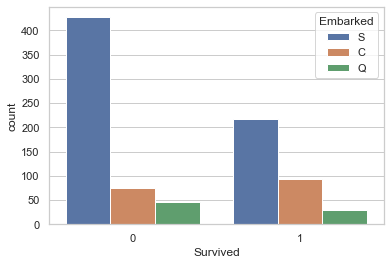

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train)

C = Cherbourg, Q = Queenstown, S = Southampton

Southampton was significantly affected 

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

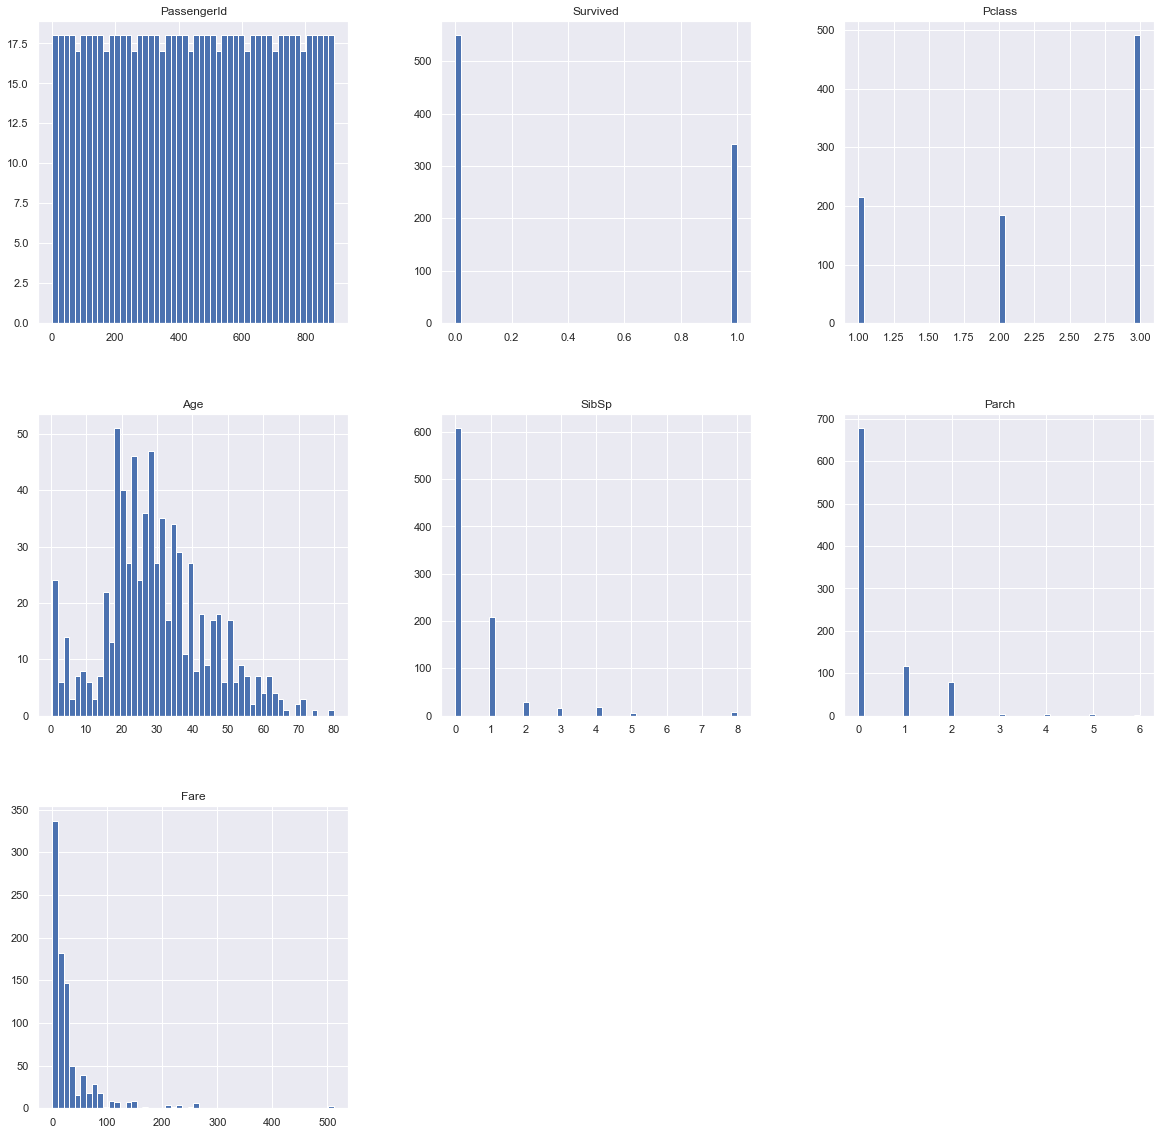

In [54]:
sns.set(rc = {'figure.figsize':(20,20)})
train.hist(bins = 50)

*Pclass graph*
There were more people from 3rd class 

*age*
We can see that the distribution is normaized. 

*SibSp*
There were a lot of people who did not travel with sibling/spouse 



## Corelation matrix

In [55]:
corelation = train.corr() 

<AxesSubplot:>

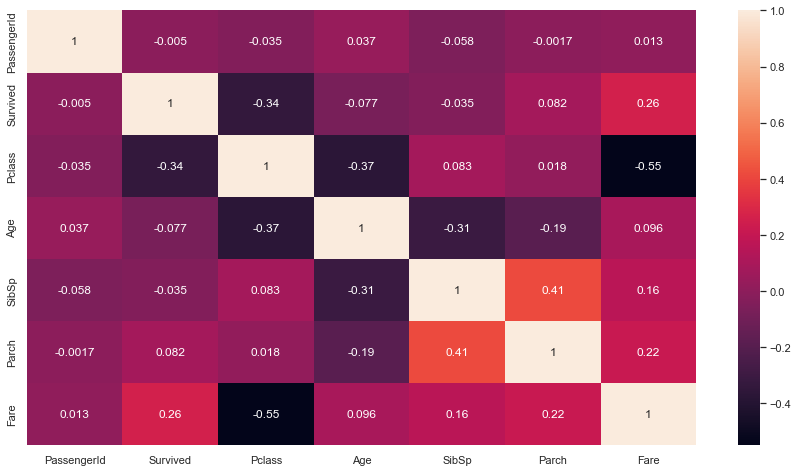

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

## Data cleaning

<AxesSubplot:xlabel='Survived', ylabel='Age'>

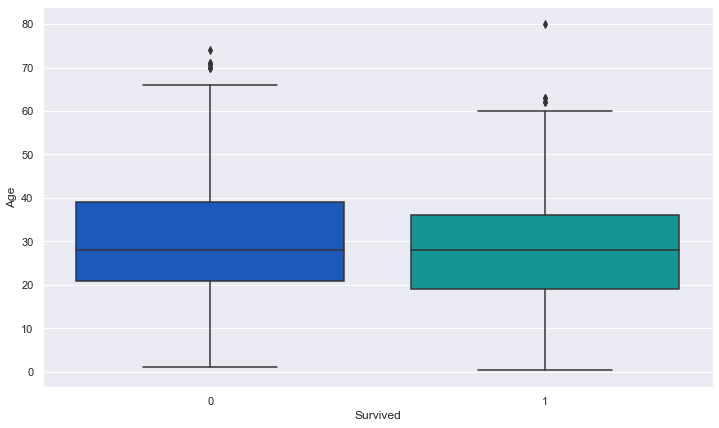

In [57]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Survived',y='Age',data=train,palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

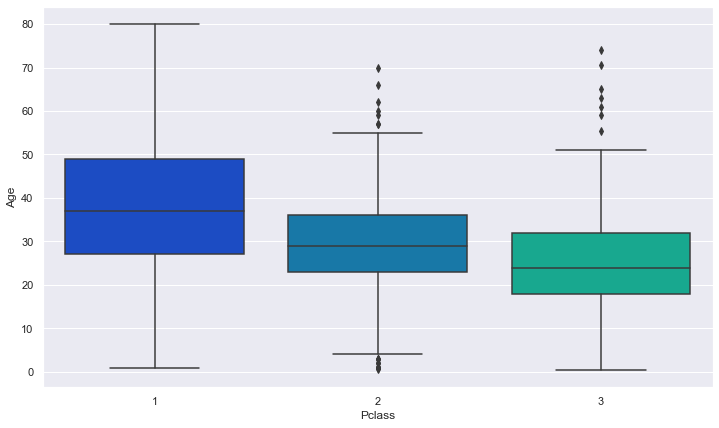

In [58]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [59]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

The code above will help us to fill the missing values.
If the age is a null value and class is 1, the value filled 

In [60]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [61]:
train.drop('Cabin',axis=1,inplace=True)

In [63]:
train.dropna(subset=['Embarked'],how='any',inplace=True)

<AxesSubplot:>

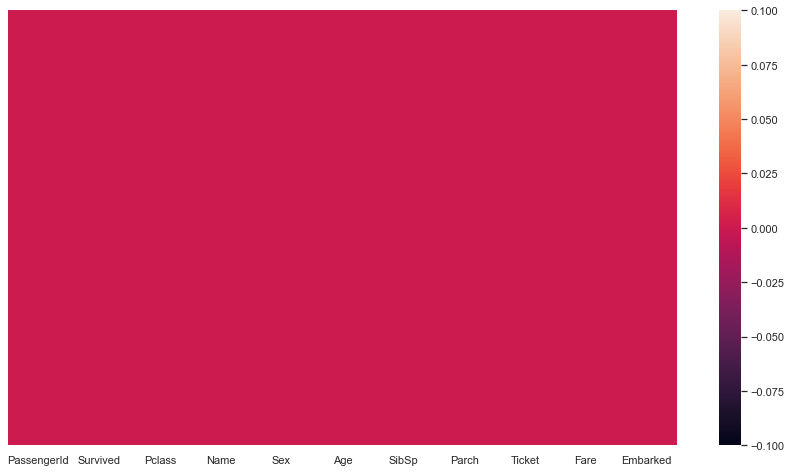

In [64]:
sns.heatmap(train.isnull(),yticklabels=False)

In [66]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [68]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Splitting Data

In [102]:
X = train.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [103]:
y = train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=42)

# Logistic regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [117]:
model = LogisticRegression(solver='lbfgs', max_iter= 900)
model.fit(X_train,y_train)

LogisticRegression(max_iter=900)

In [118]:
predictions = model.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.8014981273408239
